In [66]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [67]:
LO_MULTIP = 5
HI_MULTIP = 20
ROWS = 10
COLS = 2

Lower_Stack = np.abs(np.random.randn(ROWS, COLS) * LO_MULTIP)
Higher_Stack = np.abs(np.random.randn(ROWS, COLS) * HI_MULTIP)
X = np.vstack([Lower_Stack, Higher_Stack])
Y = np.hstack([[0] * 10, [1] * 10])
dataset = pd.DataFrame(X, columns = {"X1", "X2"})
dataset["Y"] = Y

dataset

,X2,X1,Y
0,1.635331,8.157987,0
1,1.888796,1.199336,0
2,0.794793,0.964320,0
3,5.785086,3.853365,0
4,0.652199,9.109575,0
5,0.378252,2.104591,0
6,1.233011,3.127785,0
7,4.960684,9.525318,0
8,0.073886,1.502394,0
9,1.775144,9.461809,0


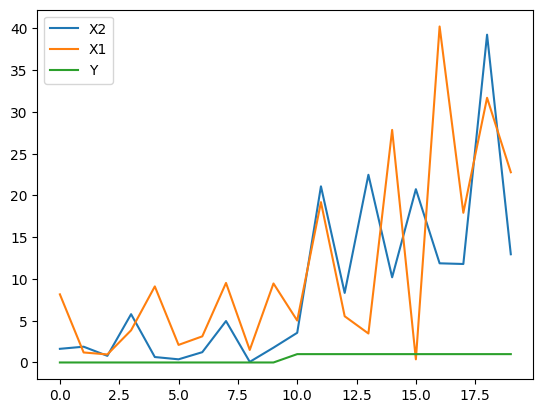

In [68]:
plt.plot(dataset, label="Inline Label")
plt.legend(["X2", "X1", "Y"])

In [69]:
Z = np.zeros((20, 2))
for i in range(20):
    Z[i, Y[i]] = 1

Z

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [70]:
X.shape

(20, 2)

In [71]:
Wi_1 = np.random.randn(3, 2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3, 2)
Bi_2 = np.random.randn(2)

Wi_1, Bi_1, Wi_2, Bi_2

(array([[-1.21440138,  0.87096178],
        [-0.87797062,  1.29614987],
        [ 0.61645931,  0.53659652]]),
 array([0.40469546, 0.19145087, 0.8805112 ]),
 array([[-0.45408036,  0.08595197],
        [ 0.75194659,  0.56298972],
        [-1.19498681, -0.50040967]]),
 array([ 0.25280351, -0.40801471]))

In [72]:
X.dot(Wi_1.T)

array([[  5.11934673,   9.13820134,   5.38566257],
       [ -1.24918088,  -0.10378867,   1.80792506],
       [ -0.1253125 ,   0.55209773,   1.00740841],
       [ -3.66928304,  -0.08459699,   5.63397279],
       [  7.14206114,  11.2347638 ,   5.29022045],
       [  1.37366851,   2.39577144,   1.36249362],
       [  1.22681117,   2.97153097,   2.43845971],
       [  2.27192643,   7.99090501,   8.16931254],
       [  1.21880031,   1.88245787,   0.85172713],
       [  6.08513753,  10.70539912,   6.17147788],
       [  0.05346478,   3.38432919,   4.88598568],
       [ -8.89469183,   6.36638573,  23.30747246],
       [ -5.29389626,  -0.13739736,   8.10593988],
       [-24.27583465, -15.23841254,  15.71844032],
       [ 11.86899544,  27.14243309,  21.23266029],
       [-24.87357073, -17.73225499,  12.99425914],
       [ 20.62373429,  41.72758515,  28.91215233],
       [  1.29133794,  12.88174118,  16.89034307],
       [-20.06452711,   6.61887769,  41.20707212],
       [  4.10279249,  18.14857

In [73]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    #first layer
    M = 1 / (1 + np.exp(-(X.dot(Wi_1.T) + Bi_1)))

    # second layer
    A = M.dot(Wi_2) + Bi_2 

    expA = np.exp(A)

    Y = expA / expA.sum(axis=1, keepdims=True)

    return Y, M

In [74]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.40579209, 0.59420791],
        [0.48668948, 0.51331052],
        [0.46957345, 0.53042655],
        [0.51172624, 0.48827376],
        [0.40537868, 0.59462132],
        [0.43699434, 0.56300566],
        [0.43048279, 0.56951721],
        [0.41337142, 0.58662858],
        [0.44705395, 0.55294605],
        [0.40530274, 0.59469726],
        [0.45547039, 0.54452961],
        [0.53862769, 0.46137231],
        [0.51482678, 0.48517322],
        [0.4915611 , 0.5084389 ],
        [0.40496204, 0.59503796],
        [0.49156124, 0.50843876],
        [0.40496143, 0.59503857],
        [0.42527922, 0.57472078],
        [0.53867009, 0.46132991],
        [0.40638141, 0.59361859]]),
 array([[9.96026166e-01, 9.99911255e-01, 9.98104119e-01],
        [3.00590943e-01, 5.21901527e-01, 9.36340836e-01],
        [5.69394942e-01, 6.77771349e-01, 8.68518144e-01],
        [3.68062262e-02, 5.26688082e-01, 9.98520372e-01],
        [9.99472459e-01, 9.99989094e-01, 9.97914651e-01],
        [8.55494732e-01, 9.3

In [75]:
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z-Y)

def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z - output).dot(Wi_2.T) * H * (1-H)
    return X.T.dot(dZ)

def diff_B2(Z, Y):
    return (Z - Y).sum(axis=0)

def diff_B1(Z, Y, Wi_2, H):
    return ((Z - Y).dot(Wi_2.T) * H * (1 - H)).sum(axis=0)

In [76]:
learning_rate = 1e-3

for epoch in range(15000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output)
    Bi_2 += learning_rate * diff_B2(Z, output)
    Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 += learning_rate * diff_B1(Z, output, Wi_2, hidden)

In [82]:
X_test = np.array([8, 5])

hidden_output = 1 / (1 + np.exp(-X_test.dot(Wi_1.T) - Bi_1))
Outer_layer_output = hidden_output.dot(Wi_2) + Bi_2 
expA = np.exp(Outer_layer_output)
Y = expA / expA.sum()
print(f"prob of class 0 > {Y[0]}\nprob of class 1 > {Y[1]}")

prob of class 0 > 0.21508070428273368
prob of class 1 > 0.7849192957172664
